In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.special

In [18]:
#Neural net class that sets the size and shape of the network array
class net:
    def __init__(self, iNodes, hNodes, oNodes, lRate):
        #init variable number of input, output, hidden nodes, learning rate
        self.iNodes = iNodes
        self.hNodes = hNodes
        self.oNodes = oNodes
        self.lRate = lRate
        
        #Weight input hidden, weight hidden output
        #Randomly cast weights under normal distribution
        self.wih = np.random.normal(0.0, pow(self.hNodes, -0.5), (self.hNodes, self.iNodes))
        self.who = np.random.normal(0.0, pow(self.oNodes, -0.5), (self.oNodes, self.hNodes))
        
        #Sigmoid function cast to anonymous function
        self.sigmoid = lambda x: scipy.special.expit(x)
        
        pass
    
    #Method conducting the feed forward pass
    def query(self, inputList):
        #Conversion to array matrix
        inputs = np.array(inputList, ndmin = 2).T
        
        #Dot product of hidden inputs X hidden weight
        hiddenInputs = np.dot(self.wih, inputs)
        
        #Outputs run through sigmoid function
        hiddenOutputs = self.sigmoid(hiddenInputs)
        
        #Dot product of hidden outputs X weights
        finalInputs = np.dot(self.who, hiddenOutputs)
        
        #Final outputs run through sigmoid function
        finalOutputs = self.sigmoid(finalInputs)
        
        return finalOutputs
    
    #Method conducting error sampling and refinement
    def train(self, inputList, targetList):
        
        #Initial input list and target values transposed to numpy array
        inputs = np.array(inputList, ndmin = 2).T
        targets = np.array(targetList, ndmin = 2).T
        
        #Hidden layer summation, activation function
        hiddenInputs = np.dot(self.wih, inputs)
        hiddenOutputs = self.sigmoid(hiddenInputs)
        
        #Final output layer summation, activation function
        finalInputs = np.dot(self.who, hiddenOutputs)
        finalOutputs = self.sigmoid(finalInputs)
        
        #Calculate error
        outputError = targets - finalOutputs
        
        #Transpose error to numpy array
        hiddenError = np.dot(self.who.T, outputError)
        
        #Refine error
        self.who += self.lRate * np.dot((outputError * finalOutputs * (1.0 - finalOutputs)), np.transpose(hiddenOutputs))
        self.wih += self.lRate * np.dot((hiddenError * hiddenOutputs * (1.0 - hiddenOutputs)), np.transpose(inputs))
        
        pass

In [19]:
#Define input nodes, hidden layer nodes, output nodes
#Inputs as 784 (28 * 28) data features for given img
inputs = 784
hiddens = 100
outputs = 10

#Define learning rate
rate = 0.3

#Init neural net class object
n = net(inputs, hiddens, outputs, rate)

#Open training CSV file, read
trainFile = open("mnist_dataset/mnist_train.csv", 'r')
trainList = trainFile.readlines()
trainFile.close()

#Initial transposition of target / input values to numpy array 
for r in trainList:
    values = r.split(',')
    inputs = (np.asfarray(values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(outputs) + 0.01
    targets[int(values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [20]:
#Define training epochs
epochs = 10

#Inner loop to conduct multiple training epochs
for i in range (epochs):
    for record in trainList:
        values = record.split(',')
        inputs = (np.asfarray(values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(outputs) + 0.01
        targets[int(values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass
    

In [21]:
dataFile = open("mnist_dataset/mnist_test.csv", 'r')
dataList = dataFile.readlines()
dataFile.close()

#values = dataList[0].split(',')
#imArr = np.asfarray(values[1:]).reshape((28, 28))
#plt.imshow(imArr, cmap='Greys', interpolation='None')


Performance =  0.9498


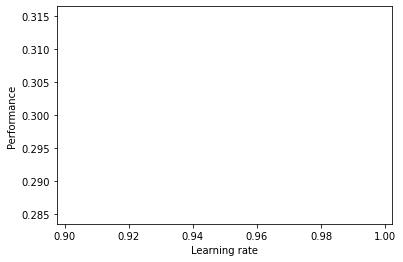

In [22]:
#Tally for correct network outputs
correct = []

for r in dataList:
    vals = r.split(',')
    targetLabel = int(vals[0])
    #print(targetLabel, "Target label")
    inputs = (np.asfarray(vals[1:]) / 255.9 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    #print(label, "Network response")
    if (label == targetLabel):
        correct.append(1)
    else:
        correct.append(0)
        pass
    pass

correctArray = np.asarray(correct)
print("Performance = ", correctArray.sum() / correctArray.size)

performance = (correctArray.sum() / correctArray.size)

plt.plot(performance, rate)
plt.ylabel("Performance")
plt.xlabel("Learning rate")
plt.show()
        